 
                                 
                                             @Zamith@
                            
                                       
                                       
Esse trabalho foi desenvolvido utilizando como ferramenta para análise dos dados a linguagem de programacao PYTHON pelas diversas caracteristicas positivas relacionas
a Estatistica e exploração de dados
                                       
                          

                                            PARTE I
                                      
                                    APRESENTAÇÃO DOS DADOS

In [30]:
import pandas as pd # importando Data Frame onde vou utilizar meu aquivo .txt
import matplotlib.pyplot as plt # lib importantíssima para plotagem dos 
 #gráficos da atividade
import numpy as np  # lib matemática do python
import statsmodels.api as sm # lib estatistica
from scipy import stats # outra poderosa lib estatistica

%matplotlib inline 

df=pd.read_csv("/Users/thiagozamith/Desktop/dados2.txt",index_col=0) # amostrando 
                                                                     #os dados do arquivo
df.head()

,Lat,Lon,Battery,bHead,Wspd,Wdir,Gust,Atmp,Pres,Dewp,...,Cdir1,Cvel2,Cdir2,Cvel3,Cdir3,Wvht,Wmax,Dpd,Mwd,Spread
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-04-23 15:00:00,-28.4892,-47.5275,12.5,136,0.0,299,0.0,21.1,1014.94,19.1,...,195,66.14,171,81.01,182,3.20,5.01,28.6,58,62.8
2009-04-23 16:00:00,-28.4888,-47.5278,12.8,142,0.0,306,0.0,23.0,1013.87,18.1,...,237,98.73,233,81.91,229,3.05,6.03,33.3,54,57.9
2009-04-23 17:00:00,-28.4890,-47.5278,12.8,140,0.0,303,0.0,23.6,1013.86,18.1,...,225,115.83,229,102.89,238,2.73,4.80,28.6,44,61.2
2009-04-23 18:00:00,-28.4892,-47.5278,12.8,133,0.0,296,0.0,23.3,1013.60,19.2,...,225,169.52,230,166.52,227,2.91,5.21,28.6,32,61.4
2009-04-23 19:00:00,-28.4890,-47.5278,13.0,144,0.0,307,0.0,23.3,1014.04,18.6,...,230,154.33,238,157.37,238,2.60,5.56,9.1,58,55.2


In [31]:
df.isnull().values.any()
# Verificando tem algum dado faltando ou dado como "NaN" 
#, retorna False,sem dados faltando...

False

In [32]:
df_=df.iloc[1:4321,[9,10]] 

# gerando um Dataframe  com duas variaveis de nossa escolha, 6 meses amostragem 
# 30 dias x 24h x 6 meses = 4320h
df_.head()
     


<bound method NDFrame.head of                      Dewp  Humi
Datetime                       
2009-04-23 16:00:00  18.1  74.3
2009-04-23 17:00:00  18.1  71.3
2009-04-23 18:00:00  19.2  77.9
2009-04-23 19:00:00  18.6  75.0
2009-04-23 20:00:00  18.8  81.0
...                   ...   ...
2009-10-20 12:00:00  19.8  91.8
2009-10-20 13:00:00  19.8  90.2
2009-10-20 14:00:00  19.4  87.3
2009-10-20 15:00:00  19.4  87.0
2009-10-20 16:00:00  19.2  87.3

[4320 rows x 2 columns]>

                                          PARTE II 

                      INVESTIGACAO E INTERPRETAÇÃO ESTATÍSTICA DOS DADOS

                                Gráfico Temporal Inicial

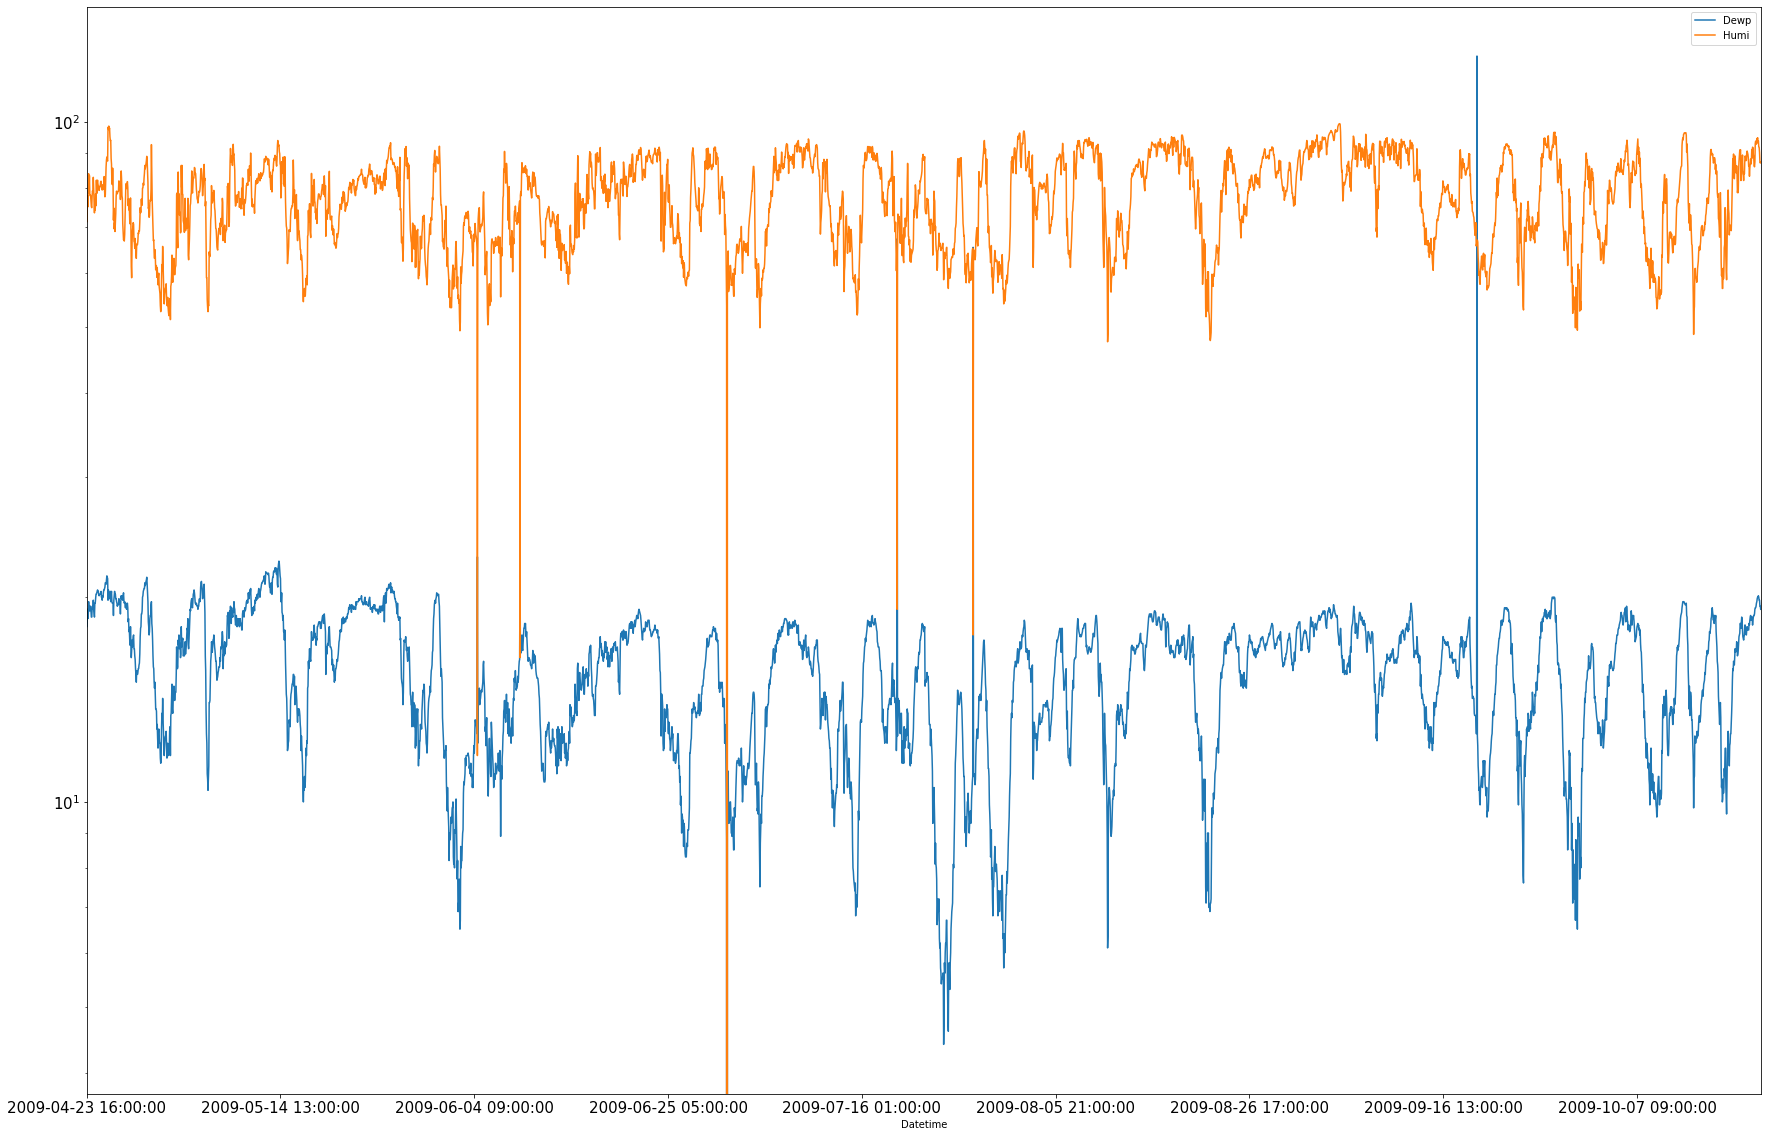

In [33]:
df_.plot(label="Grafico Temporal",logy=True,figsize=(30,20),fontsize=15)

In [34]:
#FILTRO INICIAL= CONDICAO T> -273.15C E Ur < 0 , ABSURDOS
df_=df_[np.logical_and(df_["Dewp"] > -273.15 , df_["Humi"] > 0)] 
# Nao existe Temperatura menor que o Zero Absoluto e Umidade Relativa negativa.


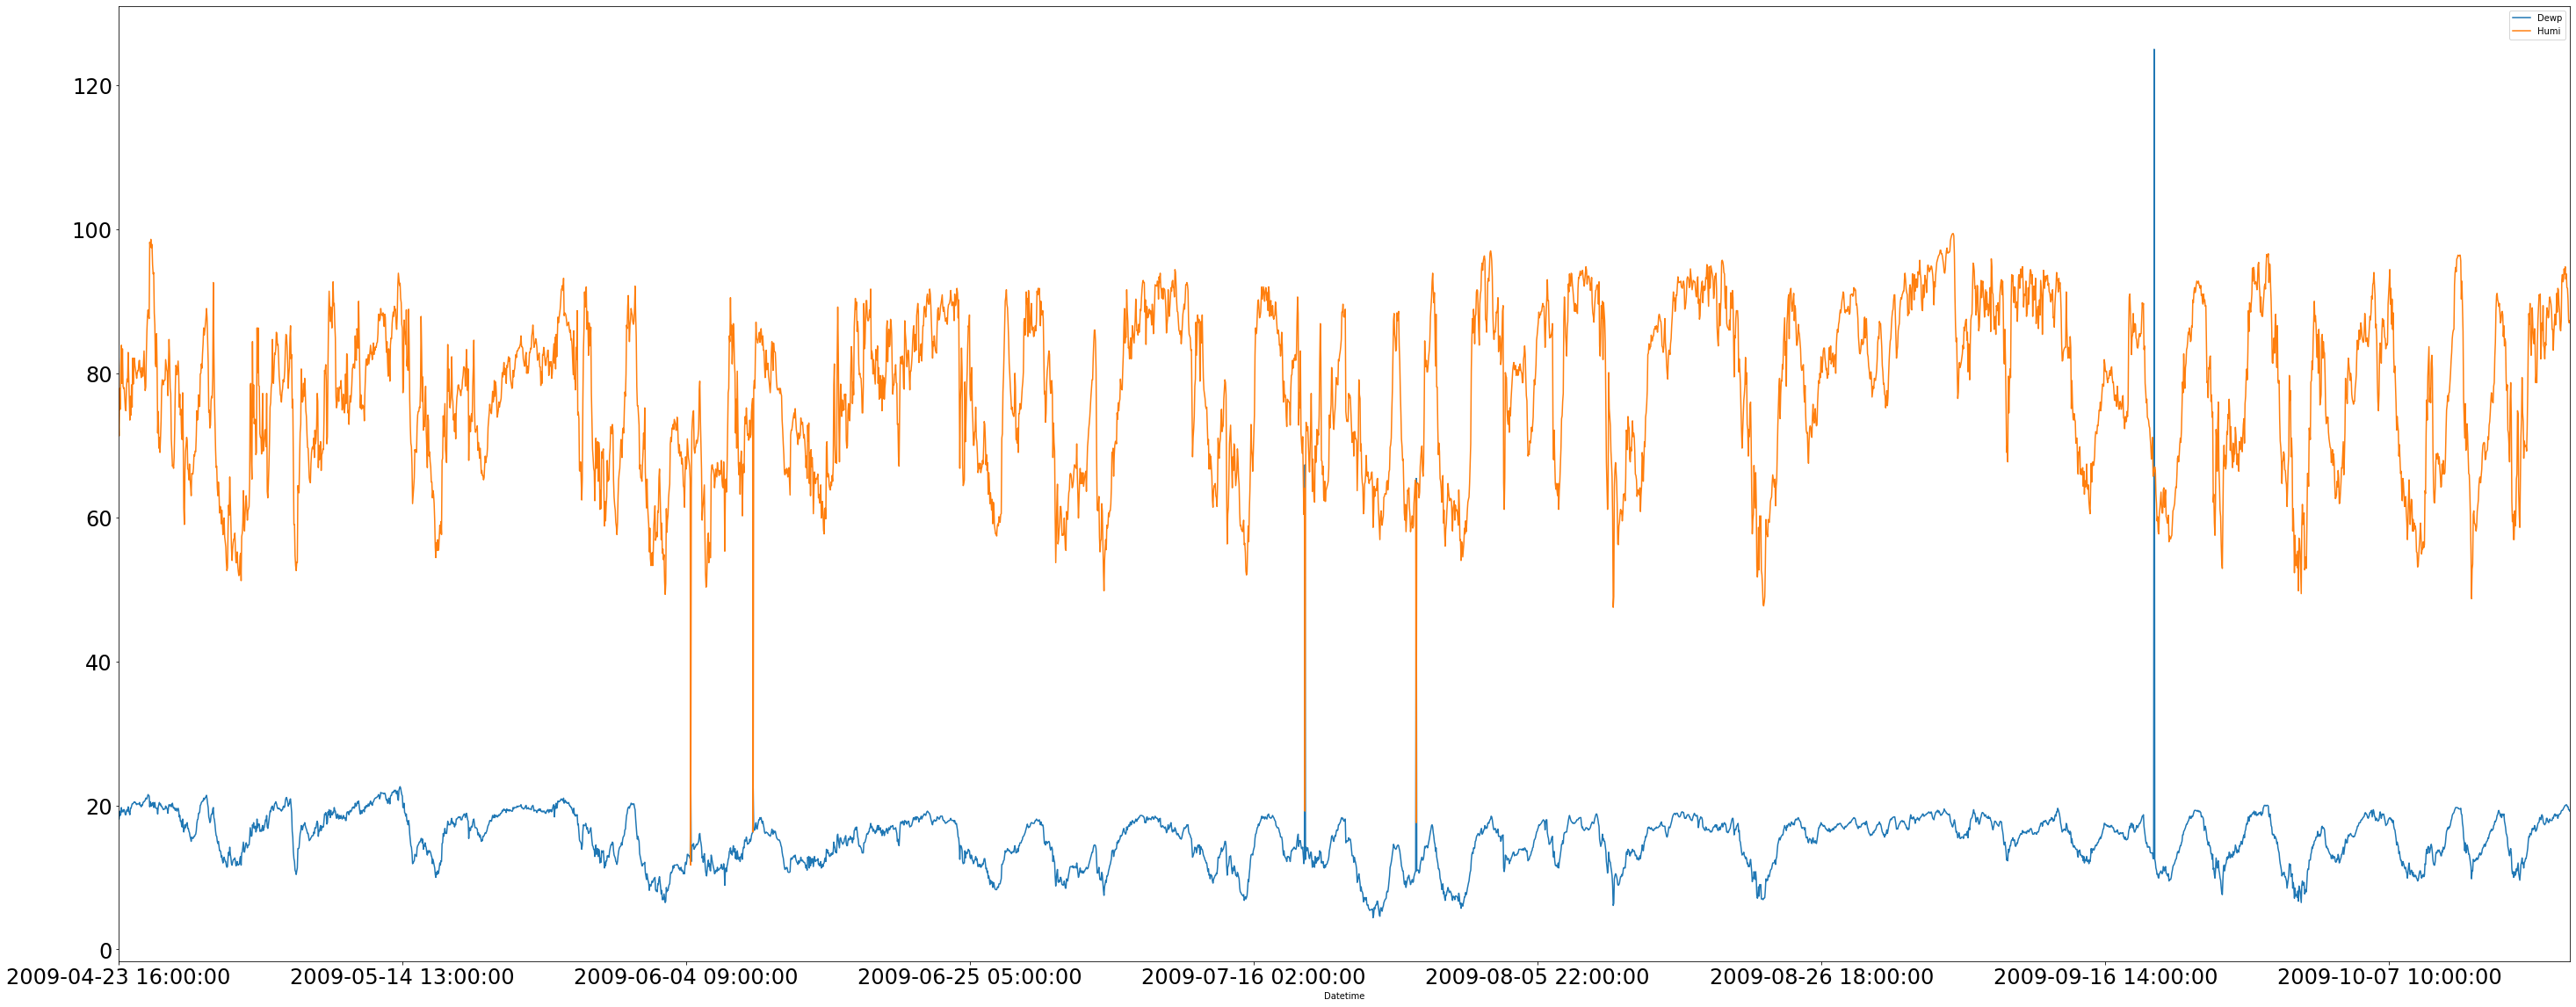

In [35]:
df_.plot(figsize=(50,20),fontsize=24) 
# acerca dessa plotagem, podemos reparar a presenca de outliers, 
#isto é dados que fogem d normalidade

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20403250>,
      dtype=object)

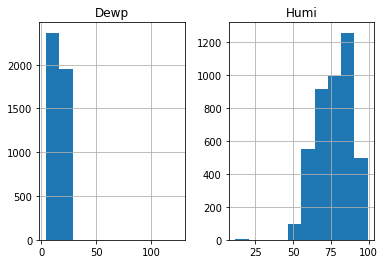

In [36]:
df_.hist() # Histograma dessas amostras em 6 meses
#Observe que a presenca que mesmo com valores que 
#fogem da normalidade a Var "Humi" ja apresenta caracteristica normal
#diferente da Temperatura do ponto.de.orvalho...


                                  GRÁFICO 'BOXPLOT'
                                    
                                  




Dewp       AxesSubplot(0.125,0.125;0.352273x0.755)
Humi    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

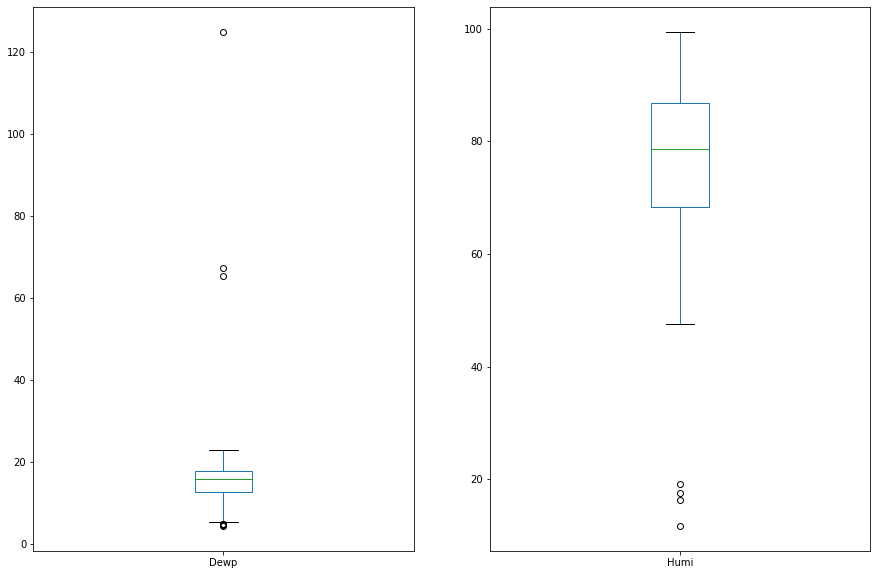

In [37]:
df_.plot(kind="box",logy=False,figsize=(15,10),subplots=True) # BOX PLOT GRAPHIC'S 

                              Variaveis Estatísticas da Amostra
                      
                              Media,Moda,Mediana e Desvio Padrão
                      
                                                

In [38]:
media=df_.mean() #media
media=pd.DataFrame(media)
print(media)


              0
Dewp  15.317752
Humi  77.263649


In [39]:
moda=df_.mode() #moda
moda=moda.transpose()
print(moda)

         0
Dewp  16.9
Humi  87.9


In [40]:
mediana=df_.median() #mediana
mediana

Dewp    16.0
Humi    78.7
dtype: float64

In [41]:
d_p=df_.std() #desvio padrao
d_p

Dewp     3.924542
Humi    11.226718
dtype: float64

In [42]:
#Filtrando Outliers
# Regra Empirica " 68–95–99.7 " ---> 

std_dev = 3
df_ = df_[(np.abs(stats.zscore(df_)) < float(std_dev)).all(axis=1)] #



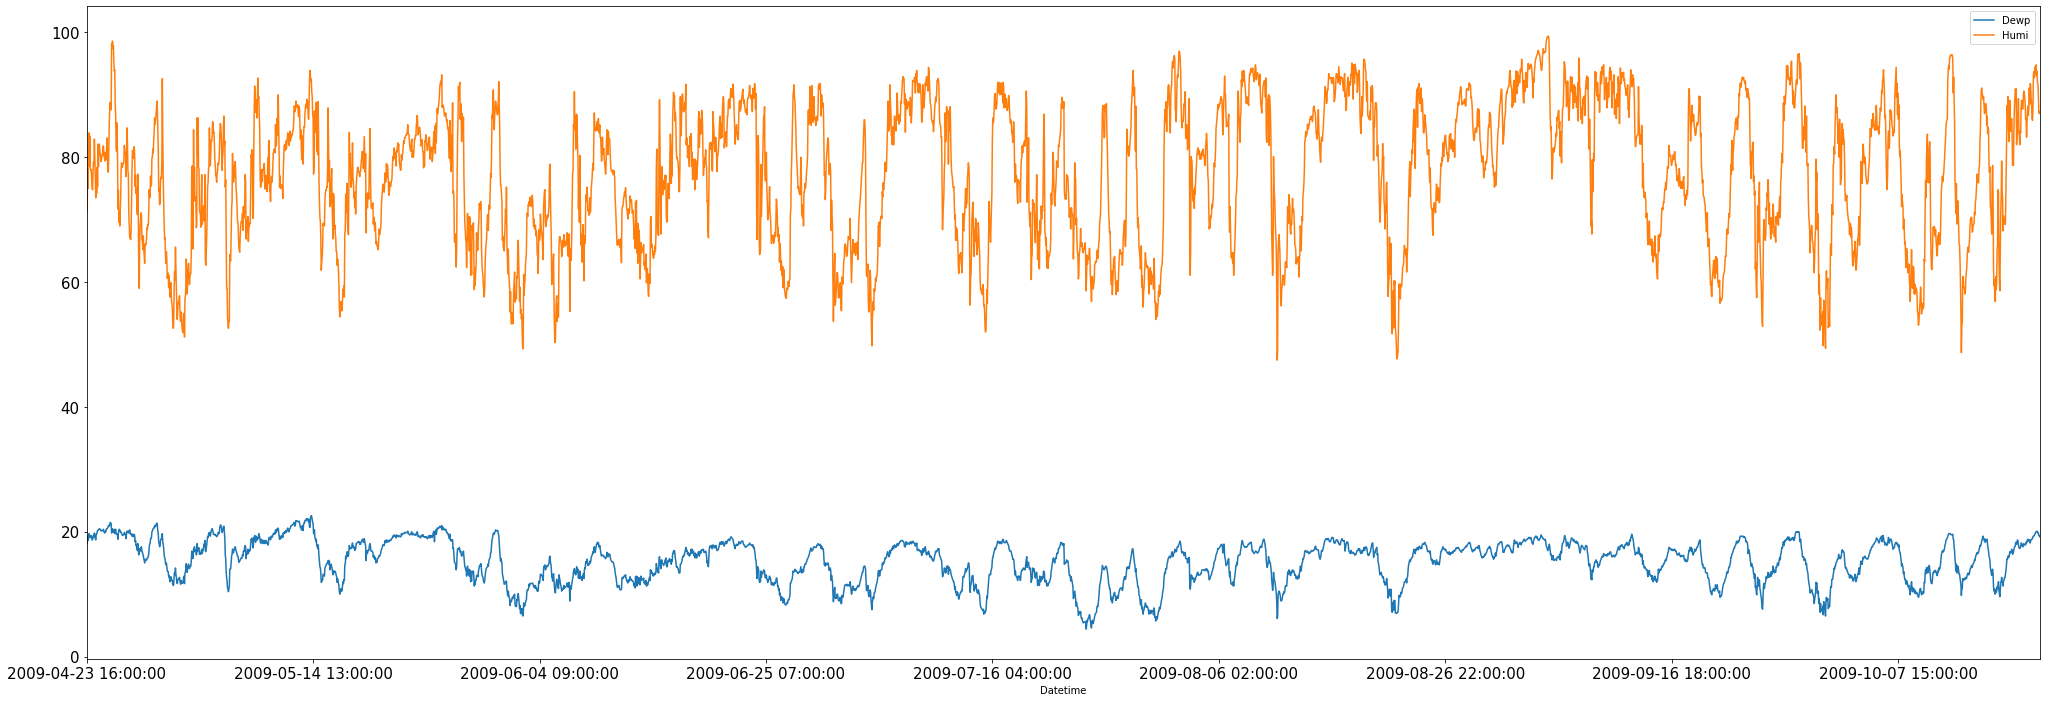

In [43]:
df_.plot(figsize=(35,12),fontsize=15) #amostrando meus dados sem a presença de Outliers

Dewp       AxesSubplot(0.125,0.125;0.352273x0.755)
Humi    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

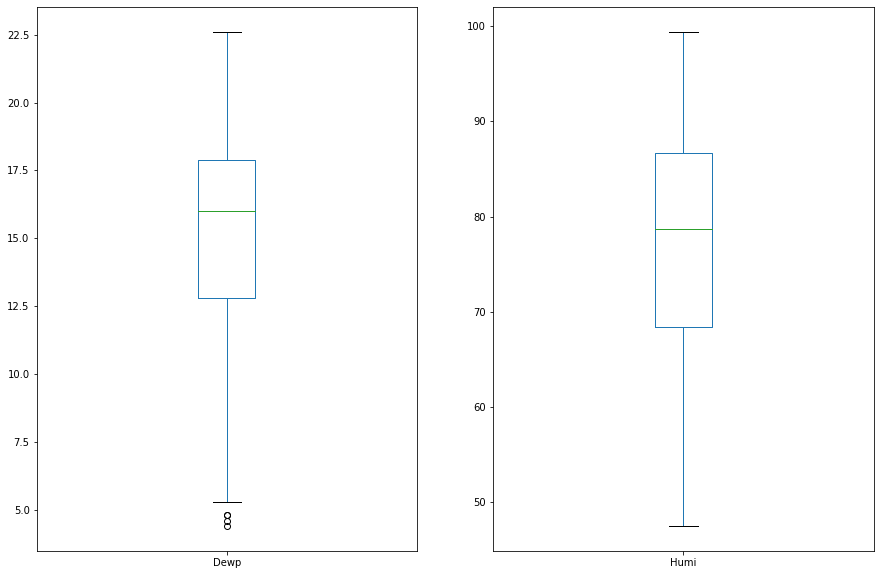

In [44]:
df_.plot(kind="box",logy=False,figsize=(15,10),subplots=True)

In [45]:
media=df_.mean() #media
media=pd.DataFrame(media)
print(media)

              0
Dewp  15.265276
Humi  77.322763


In [46]:
moda=df_.mode() # moda
moda=pd.DataFrame(moda)
moda=moda.transpose()
print(moda)

         0
Dewp  16.9
Humi  87.9


In [47]:
d_p=df_.std() #desvio padrao
d_p

Dewp     3.375634
Humi    11.076531
dtype: float64

In [48]:
mediana=df_.median() #mediana
mediana

Dewp    16.0
Humi    78.7
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f161b50>,
      dtype=object)

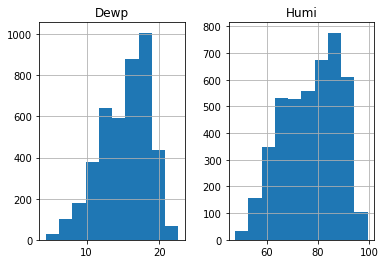

In [49]:
df_.hist() 
# observe que uma vez extraido os outliers as variaveis apresentam distribuição normal

                             GRÁFICO DE DISPERSÃO
                                
                                               

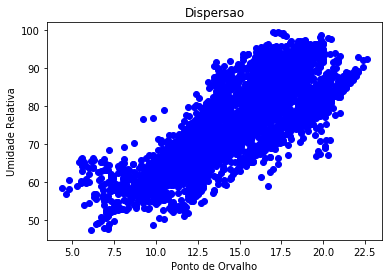

In [50]:


plt.scatter(df_["Dewp"] , df_["Humi"],color="blue")
plt.title('Dispersao') 
plt.xlabel('Ponto de Orvalho') 
plt.ylabel('Umidade Relativa') 
plt.show()

                                REGRESSÃO LINEAR
                                
                                              

In [52]:
from sklearn.linear_model import LinearRegression  #Linear Regresion
      #importando as libs estatisticas  necessarias 
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [53]:
x=df_[["Dewp"]]
x=np.array(x)
y=df_[["Humi"]]
y=np.array(y)

In [54]:
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(x, y)
# extrair coeficientes
alfa = lm_model.coef_         # Caso ajustassemos para Yˆ=βˆ + β1 * x # uma reta #
beta = lm_model.intercept_

In [55]:
print("alfa =" + str(alfa) +  "e beta = "+ str(beta))

alfa =[[2.64450128]]e beta = [36.95372166]


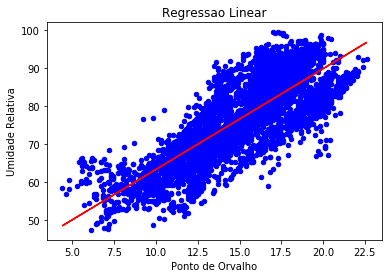

In [56]:
plt.scatter(x,y,s=20,color="blue")
plt.plot(x,(x * alfa + beta), color='r')
plt.title('Regressao Linear') 
plt.xlabel('Ponto de Orvalho') 
plt.ylabel('Umidade Relativa') 
plt.show()



                                     TABELA OLS 01
                                     
Comentários:Pode-se concluir que temos uma correlação positiva entre as duas variáveis...

In [57]:
# é necessário adicionar uma constante a matriz X
x_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, x_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     7991.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:38:35   Log-Likelihood:                -14234.
No. Observations:                4314   AIC:                         2.847e+04
Df Residuals:                    4312   BIC:                         2.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9537      0.462     79.900      0.000      36.047      37.860
x1             2.6445      0.030     89.393      0.000       2.587       2.702
==============================================================================
Omnibus:                       38.344   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.036
Skew:                          -0.072   Prob(JB):                     1.35e-06
Kurtosis:                       2.640   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                 REGRESSÃO NÃO LINEAR
                             
                                                

In [111]:
from sklearn.preprocessing import PolynomialFeatures # importando um modelo nao linear 
  
poly = PolynomialFeatures(degree =5) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

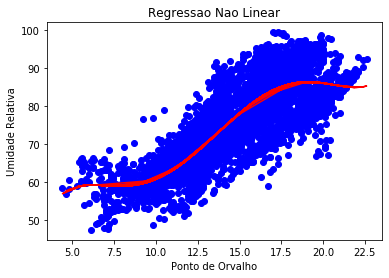

In [112]:


plt.scatter(x, y, color = 'blue') 

plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Regressao Nao Linear') 
plt.xlabel('OBSERVADA') 
plt.ylabel('PREVISTA') 
plt.show()


In [113]:
alfa2=lin2.coef_
beta2=lin2.intercept_
print("alfa2 = " + str(alfa2) + "  e beta2 = " + str(beta2))

alfa2 = [[ 0.00000000e+00  4.23274301e+01 -8.19246436e+00  7.24072507e-01
  -2.86660119e-02  4.16481852e-04]]  e beta2 = [-22.25931757]


                                 TABELA OLS 02

In [122]:
x_sm2 = sm.add_constant(X_poly)
results = sm.OLS(y, x_sm2).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1962.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:23:43   Log-Likelihood:                -13935.
No. Observations:                4314   AIC:                         2.788e+04
Df Residuals:                    4308   BIC:                         2.792e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2593     26.080     -0.853      0.393     -73.390      28.871
x1            42.3274     10.995      3.850      0.000      20.771      63.884
x2            -8.1925      1.772     -4.623      0.000     -11.667      -4.718
x3             0.7241      0.137      5.277      0.000       0.455       0.993
x4            -0.0287      0.005     -5.591      0.000      -0.039      -0.019
x5             0.0004   7.43e-05      5.608      0.000       0.000       0.001
==============================================================================
Omnibus:                       37.635   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.335
Skew:                          -0.225   Prob(JB):                     4.74e-09
Kurtosis:                       2.898   Cond. No.                     4.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                             GRÁFICO DENSIDADE KERNEL 
                              
                                      
                                     


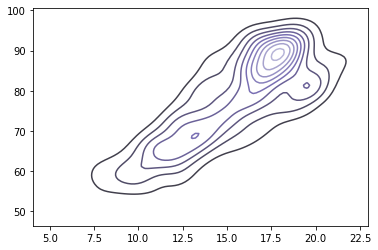

In [121]:
import seaborn as sns # Grafico variado


sns.kdeplot(df_ , shade=False, cut=0.5,cmap="Purples_d",label= "kernel")  

plt.show()
# Densidade de Kernel

